In [7]:
import pandas as pd
from IPython.display import display, HTML

# Creating the data
data = {
    "Serial Number": [1, 2, 3],
    "Sentiment": ["Positive", "Neutral", "Negative"],
    "Color": ["Light Green", "Sky Blue", "Light Red"],
    "Hex Code": ["#90EE90", "#87CEEB", "#FFB6C1"]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Applying CSS styling for colors
color_dict = {
    
    "Light Green": "#90EE90",
    "Sky Blue": "#87CEEB",
    "Light Red": "#FFB6C1"
}

styled_df = df.style.map(lambda x: f'background-color: {color_dict.get(x, "white")}' if x in color_dict else "")

# Display styled DataFrame
display(HTML(styled_df.to_html()))


In [11]:
## before ML model

In [10]:
import pandas as pd

# Load the dataset
file_path = "cleaned_english_yt_comments.csv"
df = pd.read_csv(file_path)

# Handle missing values in 'Comment' column
df['Comment'].fillna("Missing Comment", inplace=True)

# Convert 'Published At' to datetime
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')

# Descriptive statistics for numerical data


# Descriptive statistics for textual data
df['Comment Length'] = df['Comment'].apply(lambda x: len(str(x)))
text_stats = df['Comment Length'].describe()

# Display results

print("\nText Data Statistics (Comment Length):")
print(text_stats)


Text Data Statistics (Comment Length):
count    9490.000000
mean      139.924552
std       246.273149
min         3.000000
25%        43.000000
50%        78.000000
75%       149.000000
max      7794.000000
Name: Comment Length, dtype: float64


C:\Users\neeraj\AppData\Local\Temp\ipykernel_7844\3761346995.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comment'].fillna("Missing Comment", inplace=True)


In [ ]:
## After applying ML model

In [1]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = "combined_articles_3316_indiatoday_indiatv_timesofindia_zeenews_with_sentiment.csv"  # Use the correct file path
df = pd.read_csv(file_path)

# Ensure there are no empty rows in the sentiment_label column
df = df.dropna(subset=['sentiment_label'])

# Compute descriptive statistics for the sentiment_label column
descriptive_stats = {
    "Mean": [df['sentiment_label'].mean()],
    "Median": [df['sentiment_label'].median()],
    "Mode": [df['sentiment_label'].mode()[0]],
    "Standard Deviation": [df['sentiment_label'].std()],
    "Standard Error": [df['sentiment_label'].sem()],
    "Skewness": [df['sentiment_label'].skew()],
    "Kurtosis": [df['sentiment_label'].kurt()],
    "25th Percentile": [df['sentiment_label'].quantile(0.25)],
    "50th Percentile (Median)": [df['sentiment_label'].quantile(0.50)],
    "75th Percentile": [df['sentiment_label'].quantile(0.75)],
}

# Convert to DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Display the result as a table in Jupyter Notebook
display(descriptive_stats_df)

# Save the descriptive statistics to a CSV file
output_file = "sentiment_descriptive_statistics.csv"
descriptive_stats_df.to_csv(output_file, index=False)

print(f"Descriptive statistics for 'sentiment_label' saved to: {output_file}")


Mean  Median  Mode  Standard Deviation  Standard Error  Skewness  \
0  0.819059     1.0     0            0.776237         0.01348  0.325189   

   Kurtosis  25th Percentile  50th Percentile (Median)  75th Percentile  
0 -1.275705              0.0                       1.0              1.0

Descriptive statistics for 'sentiment_label' saved to: sentiment_descriptive_statistics.csv


In [12]:
import pandas as pd
from IPython.display import display

# Load the dataset
file_path = "YT_processed_results_ANALYSIS.csv"  # Use the correct file path
df = pd.read_csv(file_path)

# Ensure there are no empty rows in the sentiment_label column
df = df.dropna(subset=['sentiment_label'])

# Compute descriptive statistics for the sentiment_label column
descriptive_stats = {
    "Mean": [df['sentiment_label'].mean()],
    "Median": [df['sentiment_label'].median()],
    "Mode": [df['sentiment_label'].mode()[0]],
    "Standard Deviation": [df['sentiment_label'].std()],
    "Standard Error": [df['sentiment_label'].sem()],
    "Skewness": [df['sentiment_label'].skew()],
    "Kurtosis": [df['sentiment_label'].kurt()],
    "25th Percentile": [df['sentiment_label'].quantile(0.25)],
    "50th Percentile (Median)": [df['sentiment_label'].quantile(0.50)],
    "75th Percentile": [df['sentiment_label'].quantile(0.75)],
}

# Convert to DataFrame
descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Display the result as a table in Jupyter Notebook
display(descriptive_stats_df)

# Save the descriptive statistics to a CSV file
output_file = "sentiment_descriptive_statistics.csv"
descriptive_stats_df.to_csv(output_file, index=False)

print(f"Descriptive statistics for 'sentiment_label' saved to: {output_file}")


Mean  Median  Mode  Standard Deviation  Standard Error  Skewness  \
0  1.450132     2.0     2            0.711733        0.007312  -0.90189   

   Kurtosis  25th Percentile  50th Percentile (Median)  75th Percentile  
0 -0.514426              1.0                       2.0              2.0

Descriptive statistics for 'sentiment_label' saved to: sentiment_descriptive_statistics.csv


In [13]:
# Majority of the comments are Positive (Mode = 2, Median = 2).
# A small proportion of the comments are Negative (Skewness < 0).
# The distribution is fairly stable with a low standard error, meaning the results are reliable.
# The standard deviation (0.7117) shows that most values are close to the mean, so there isn’t much variation.

In [14]:
##SHAPIRO-WILK TEST

In [15]:
import pandas as pd
from scipy.stats import shapiro

# Load dataset
file_path = "YT_processed_results_ANALYSIS.csv"
df = pd.read_csv(file_path)

# Drop NaN values in the sentiment_label column
df = df.dropna(subset=['sentiment_label'])

# Perform Shapiro-Wilk test
shapiro_test_stat, p_value = shapiro(df['sentiment_label'])

# Display results
print("Shapiro-Wilk Test Results:")
print(f"Test Statistic: {shapiro_test_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The data does NOT follow a normal distribution (Reject H0).")
else:
    print("The data follows a normal distribution (Fail to reject H0).")


Shapiro-Wilk Test Results:
Test Statistic: 0.7154
P-Value: 0.0000
The data does NOT follow a normal distribution (Reject H0).


D:\Documents\Zoom\anconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9475.
  res = hypotest_fun_out(*samples, **kwds)


In [1]:
## YT DATE TREND ANALYSIS

In [1]:
###############################################################################################

In [3]:
## sentiment distribution w.r.t time

<Figure size 1200x600 with 0 Axes>

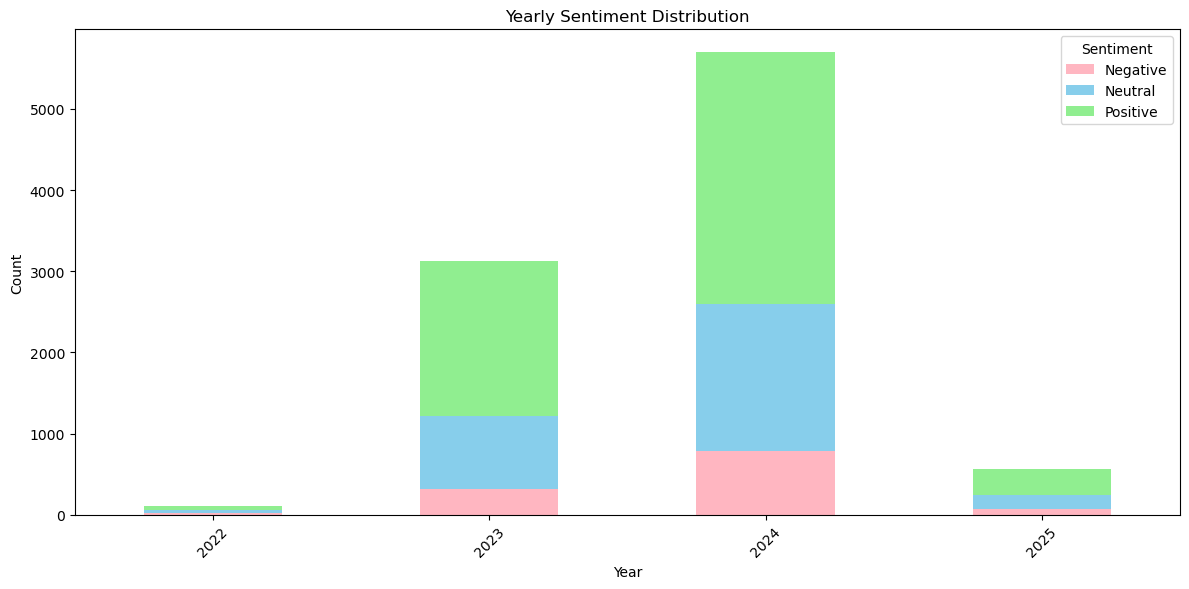

<Figure size 1200x600 with 0 Axes>

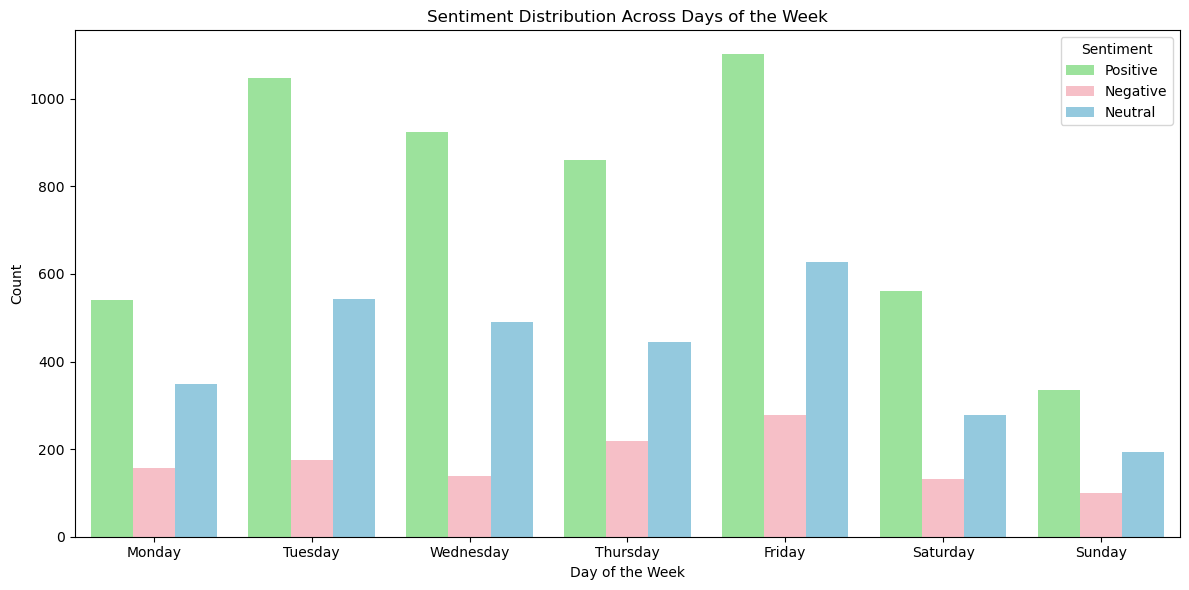

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "antara_mam_yt_withsentiment.csv"  # Change this to your actual filename
df = pd.read_csv(file_path)

# Convert 'Published At' to datetime
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Published At'])

# Convert cluster column to numeric
df['cluster'] = pd.to_numeric(df['cluster'], errors='coerce')

# Map cluster to sentiment labels
sentiment_mapping = {0: 'Positive', 1: 'Neutral', 2: 'Negative'}
df['sentiment'] = df['cluster'].map(sentiment_mapping)

# Drop rows with NaN sentiment values (if any)
df = df.dropna(subset=['sentiment'])

# Extract time components
df['year'] = df['Published At'].dt.year
df['month'] = df['Published At'].dt.strftime('%Y-%m')  # Year-Month format
df['day_of_week'] = df['Published At'].dt.day_name()

# Define custom colors for sentiment
sentiment_colors = {'Positive': '#90EE90', 'Neutral': '#87CEEB', 'Negative': '#FFB6C1'}

## 📊 **Yearly Sentiment Distribution**
yearly_sentiment = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
yearly_sentiment.plot(kind='bar', stacked=True, color=[sentiment_colors[s] for s in yearly_sentiment.columns], figsize=(12, 6))
plt.title('Yearly Sentiment Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('yearly_sentiment_trend.png')
plt.show()

## 📊 **Monthly Sentiment Distribution**
monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='bar', stacked=True, color=[sentiment_colors[s] for s in monthly_sentiment.columns], figsize=(12, 6))
plt.title('Monthly Sentiment Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('monthly_sentiment_distribution.png')
plt.show()

## 📊 **Day-wise Sentiment Analysis**
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='sentiment', data=df, palette=sentiment_colors,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sentiment Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('day_wise_sentiment_distribution.png')
plt.show()


In [4]:
#### news article

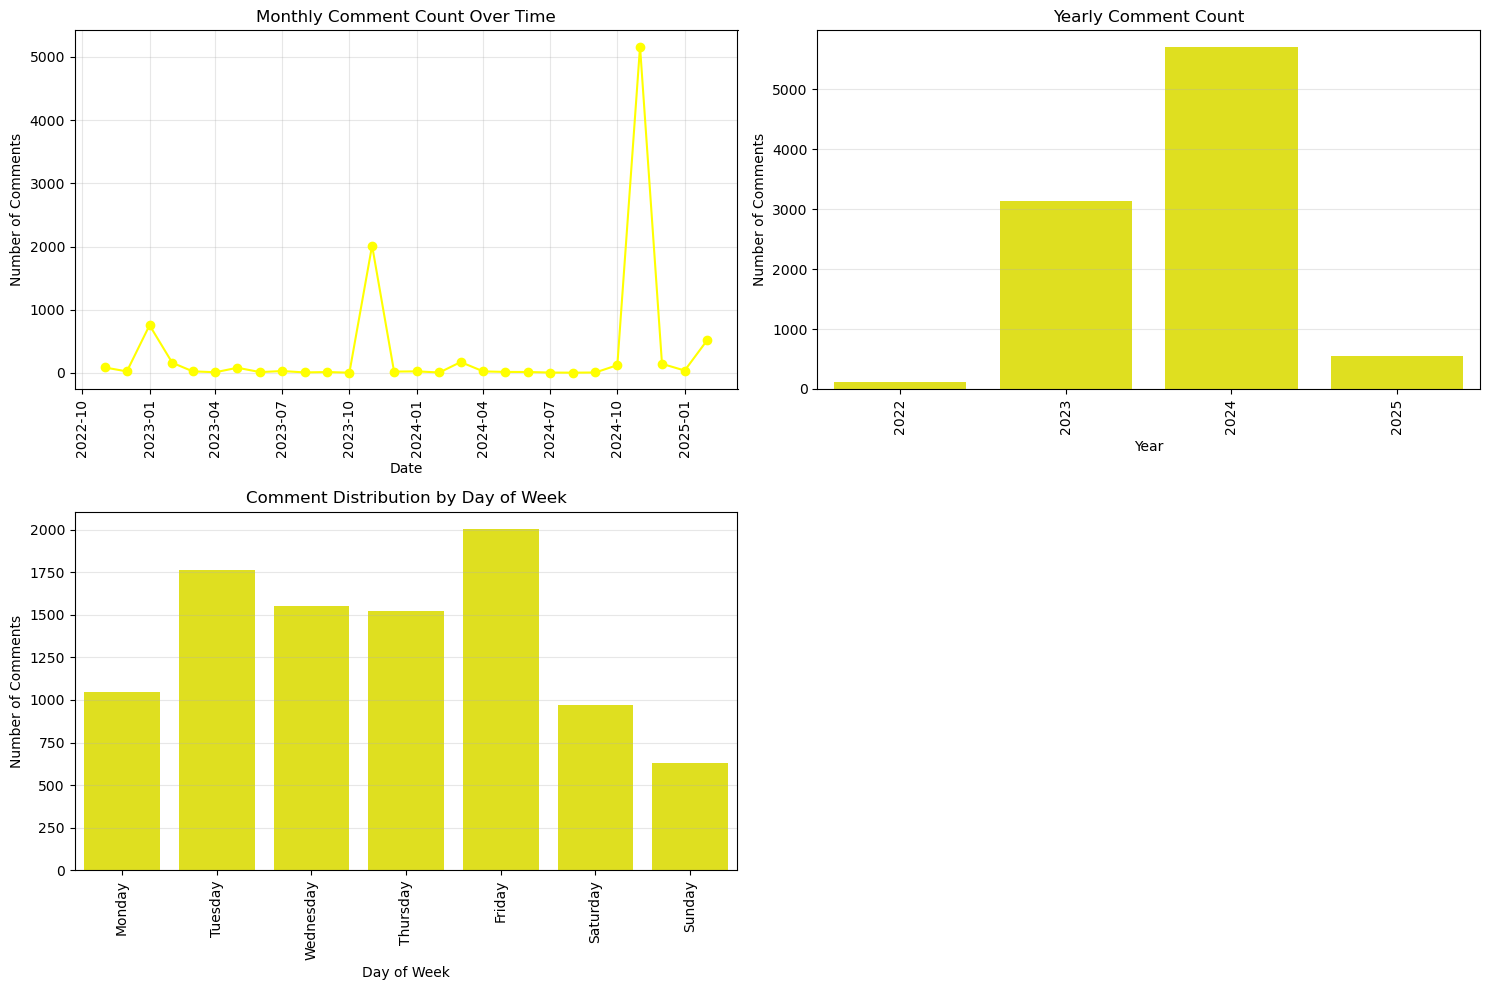

Sample of monthly counts:
   Year  Month  Count       Date
0  2022     11     85 2022-11-01
1  2022     12     23 2022-12-01
2  2023      1    754 2023-01-01
3  2023      2    160 2023-02-01
4  2023      3     24 2023-03-01

Sample of yearly counts:
   Year  Count
0  2022    108
1  2023   3128
2  2024   5696
3  2025    558

Weekday distribution:
     Weekday  Count
1     Monday   1047
5    Tuesday   1766
6  Wednesday   1551
4   Thursday   1524
0     Friday   2005
2   Saturday    969
3     Sunday    628


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Define custom color for all graphs
common_color = '#FFFF00'  # Light Yellow

# Load the data
def analyze_news_coverage(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert 'Published At' to datetime
    df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce')
    df = df.dropna(subset=['Published At'])  # Drop invalid dates

    # Extract date components
    df['Year'] = df['Published At'].dt.year
    df['Month'] = df['Published At'].dt.month
    df['Day'] = df['Published At'].dt.day
    df['Weekday'] = df['Published At'].dt.day_name()

    # Create time-based aggregations
    monthly_counts = df.groupby([df['Year'], df['Month']]).size().reset_index(name='Count')
    monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(Day=1))

    yearly_counts = df.groupby('Year').size().reset_index(name='Count')

    weekday_counts = df.groupby('Weekday').size().reset_index(name='Count')
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts['Weekday'] = pd.Categorical(weekday_counts['Weekday'], categories=weekday_order, ordered=True)
    weekday_counts = weekday_counts.sort_values('Weekday')

    # Create plots
    plt.figure(figsize=(15, 10))

    # Plot 1: Monthly article count
    plt.subplot(2, 2, 1)
    plt.plot(monthly_counts['Date'], monthly_counts['Count'], marker='o', linestyle='-', color=common_color)
    plt.title('Monthly Comment Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Comments')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=90)  # Set labels to vertical

    # Plot 2: Yearly article count
    plt.subplot(2, 2, 2)
    sns.barplot(x='Year', y='Count', data=yearly_counts, color=common_color)
    plt.title('Yearly Comment Count')
    plt.xlabel('Year')
    plt.ylabel('Number of Comments')
    plt.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=90)  # Set labels to vertical

    # Plot 3: Weekday distribution
    plt.subplot(2, 2, 3)
    sns.barplot(x='Weekday', y='Count', data=weekday_counts, color=common_color)
    plt.title('Comment Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Comments')
    plt.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=90)  # Set labels to vertical

    plt.tight_layout()
    plt.savefig('air_pollution_news_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'monthly': monthly_counts,
        'yearly': yearly_counts,
        'weekday': weekday_counts,
        'original_data': df
    }

# Set the file path to your CSV file
file_path = 'cleaned_english_yt_comments.csv'  # Replace with your actual file path

# Call the function and store the results
results = analyze_news_coverage(file_path)

# Print sample results
print("Sample of monthly counts:")
print(results['monthly'].head())

print("\nSample of yearly counts:")
print(results['yearly'].head())

print("\nWeekday distribution:")
print(results['weekday'])


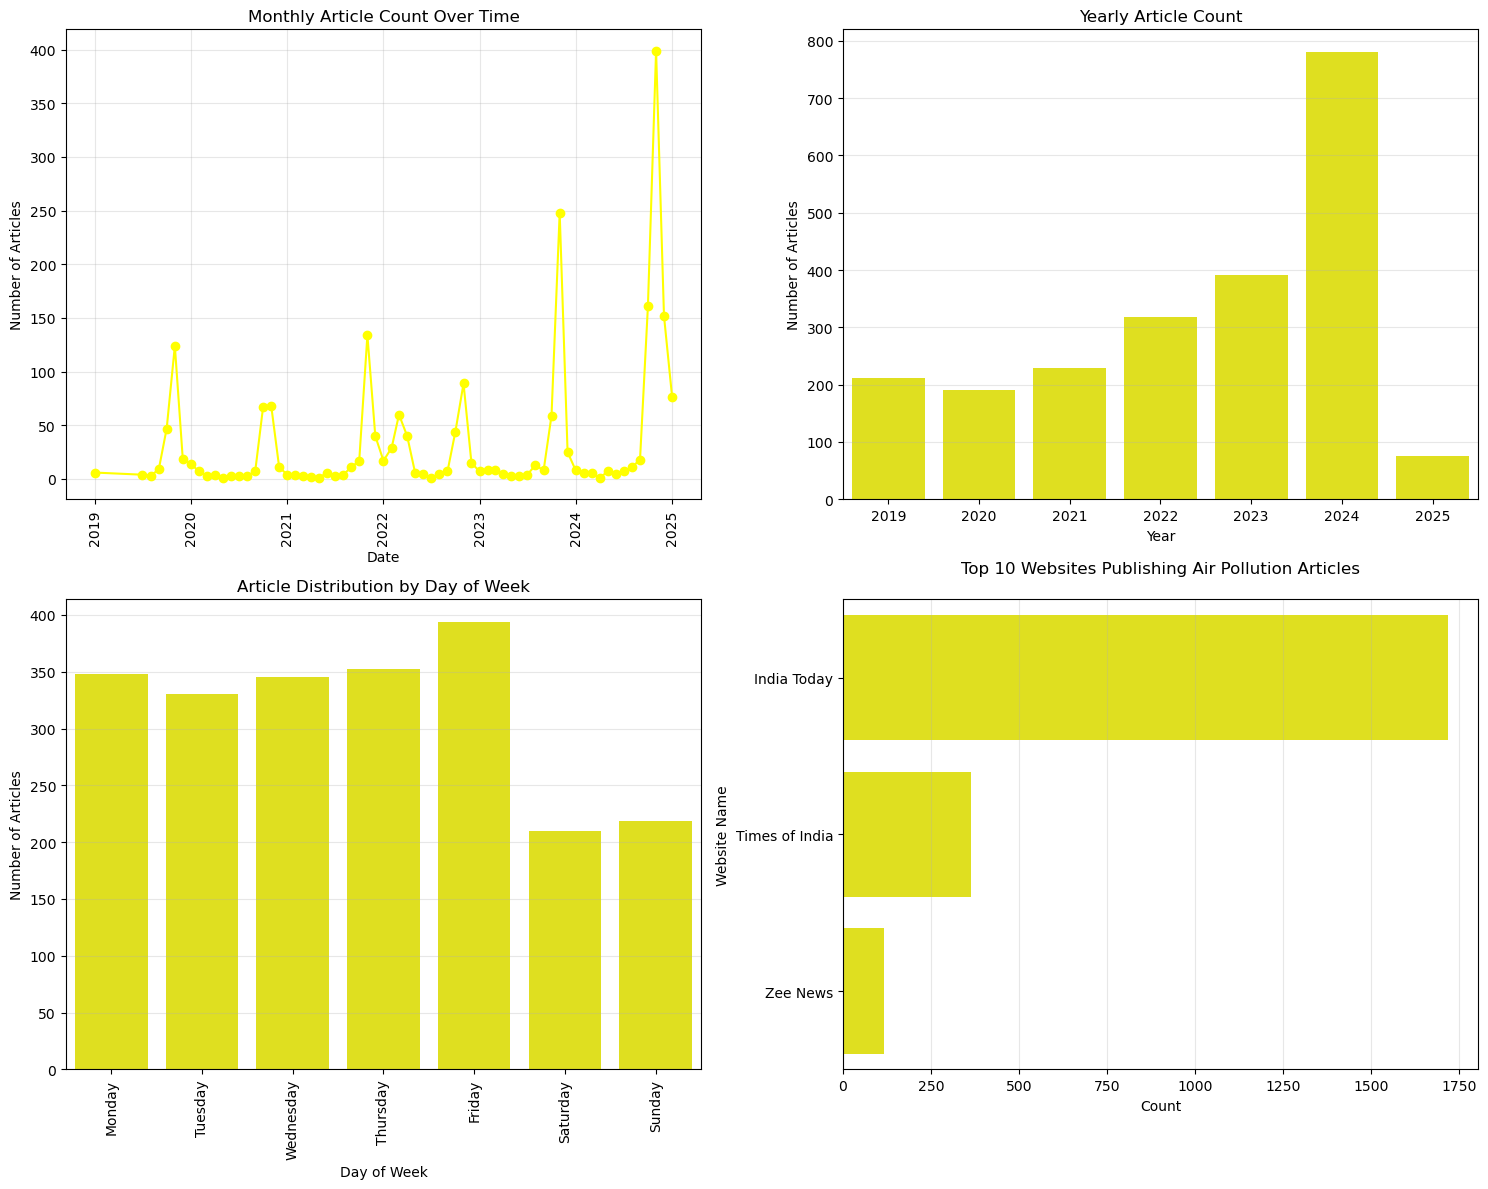


Date range of articles: 2019-01-11 to 2025-01-29
Total number of articles with valid dates: 2198

Sample of monthly counts:
    Year  Month  Count       Date
0  2019      1      6 2019-01-01
1  2019      7      4 2019-07-01
2  2019      8      3 2019-08-01
3  2019      9      9 2019-09-01
4  2019     10     47 2019-10-01

Sample of yearly counts:
    Year  Count
0  2019    212
1  2020    191
2  2021    229
3  2022    318
4  2023    391

Top 10 websites by article count:
      website_name  Count
0     India Today   1718
1  Times of India    364
2        Zee News    116


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the data with custom date parsing
def analyze_news_coverage(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Custom function to parse dates like "UPDATED: Jan 29, 2025 18:49 IST"
    def parse_custom_date(date_str):
        try:
            # Remove any "UPDATED:" prefix and normalize spaces
            cleaned_str = re.sub(r'UPDATED:', '', date_str).strip()
            # Remove the "IST" timezone
            cleaned_str = re.sub(r'\s+IST$', '', cleaned_str)

            # Try to parse with pandas
            return pd.to_datetime(cleaned_str, errors='coerce')

        except Exception:
            return pd.NaT  # Return NaT for unparseable dates

    # Apply the custom date parser to the 'date' column
    df['parsed_date'] = df['date'].apply(parse_custom_date)

    # Drop NaN dates and ensure a clean DataFrame copy
    df_clean = df.dropna(subset=['parsed_date']).copy()

    # Extract date components safely using .loc[]
    df_clean['Year'] = df_clean['parsed_date'].dt.year
    df_clean['Month'] = df_clean['parsed_date'].dt.month
    df_clean['Day'] = df_clean['parsed_date'].dt.day
    df_clean['Weekday'] = df_clean['parsed_date'].dt.day_name()

    # Aggregate data
    monthly_counts = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Count')
    monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(Day=1))

    yearly_counts = df_clean.groupby('Year').size().reset_index(name='Count')
    website_counts = df_clean.groupby('website_name').size().reset_index(name='Count').sort_values('Count', ascending=False)

    weekday_counts = df_clean.groupby('Weekday').size().reset_index(name='Count')
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts['Weekday'] = pd.Categorical(weekday_counts['Weekday'], categories=weekday_order, ordered=True)
    weekday_counts = weekday_counts.sort_values('Weekday')

    # Create plots
    plt.figure(figsize=(15, 12))

    # Plot 1: Monthly article count
    plt.subplot(2, 2, 1)
    plt.plot(monthly_counts['Date'], monthly_counts['Count'], marker='o', linestyle='-', color='#FFFF00')
    plt.title('Monthly Article Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=90)

    # Plot 2: Yearly article count
    plt.subplot(2, 2, 2)
    sns.barplot(x='Year', y='Count', data=yearly_counts, color='#FFFF00')
    plt.title('Yearly Article Count')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.grid(True, alpha=0.3, axis='y')

    # Plot 3: Weekday distribution
    plt.subplot(2, 2, 3)
    sns.barplot(x='Weekday', y='Count', data=weekday_counts, color='#FFFF00')
    plt.title('Article Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Articles')
    plt.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=90)

    # Plot 4: Top websites (sources)
    plt.subplot(2, 2, 4)
    top_websites = website_counts.head(10)
    sns.barplot(x='Count', y='website_name', data=top_websites, color='#FFFF00')
    plt.ylabel('Website Name')
    plt.grid(True, alpha=0.3, axis='x')
    plt.text(0.5, 1.05, 'Top 10 Websites Publishing Air Pollution Articles', fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.savefig('air_pollution_news_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print date range information
    if len(df_clean) > 0:
        min_date, max_date = df_clean['parsed_date'].min(), df_clean['parsed_date'].max()
        print(f"\nDate range of articles: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
        print(f"Total number of articles with valid dates: {len(df_clean)}")

    return {
        'monthly': monthly_counts,
        'yearly': yearly_counts,
        'weekday': weekday_counts,
        'website': website_counts,
        'original_data': df_clean
    }

# Set file path
file_path = 'combined_articles_3316_indiatoday_indiatv_timesofindia_zeenews.csv'

# Run analysis
try:
    results = analyze_news_coverage(file_path)
    print("\nSample of monthly counts:\n", results['monthly'].head())
    print("\nSample of yearly counts:\n", results['yearly'].head())
    print("\nTop 10 websites by article count:\n", results['website'].head(10))

except Exception as e:
    import traceback
    print(f"An error occurred: {str(e)}")
    traceback.print_exc()


In [18]:
# sentiment w.r.t time

<Figure size 1400x600 with 0 Axes>

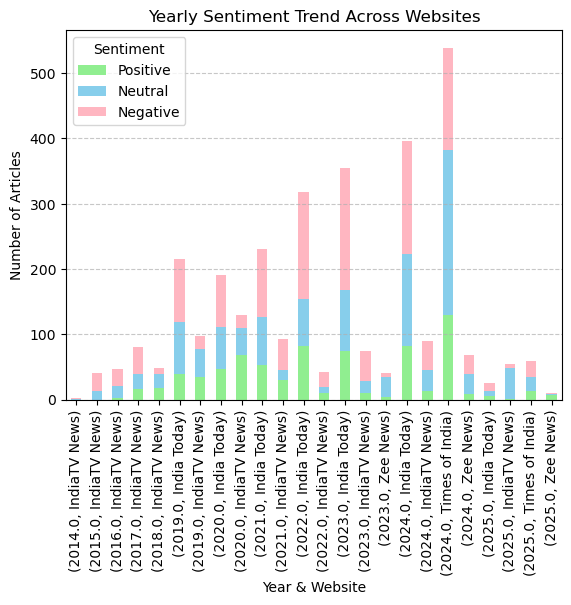

<Figure size 1400x600 with 0 Axes>

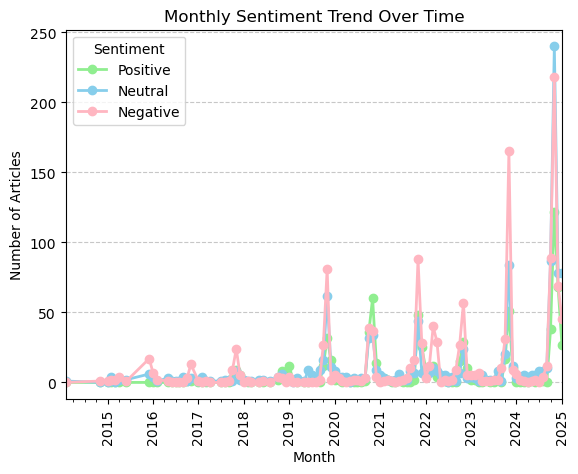

<Figure size 1400x600 with 0 Axes>

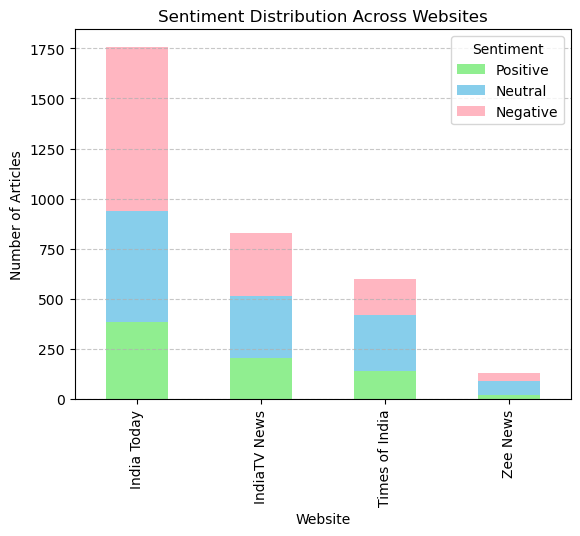

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "combined_articles_3316_indiatoday_indiatv_timesofindia_zeenews_with_sentiment.csv"  # Update with actual path
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"].str.extract(r'(\w+ \d+, \d{4})')[0], errors='coerce')

# Extract year and month
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.to_period("M")

# Standardize sentiment values (convert to title case)
df["sentiment"] = df["sentiment"].str.title()

# Define custom sentiment colors
sentiment_colors = {
    "Positive": "#90EE90",  # Light Green
    "Neutral": "#87CEEB",   # Sky Blue
    "Negative": "#FFB6C1"   # Light Red
}

# Group by year and website to count sentiment trends
yearly_trend = df.groupby(["year", "website_name", "sentiment"]).size().unstack(fill_value=0)

# Ensure sentiment columns match sentiment_colors
yearly_trend = yearly_trend.reindex(columns=sentiment_colors.keys(), fill_value=0)

# Plot yearly sentiment trends
plt.figure(figsize=(14, 6))
yearly_trend.plot(kind="bar", stacked=True, color=[sentiment_colors[s] for s in yearly_trend.columns])
plt.title("Yearly Sentiment Trend Across Websites")
plt.ylabel("Number of Articles")
plt.xlabel("Year & Website")
plt.xticks(rotation=90)  # Make x-axis labels vertical
plt.legend(title="Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Group by month and sentiment to see trends over time
monthly_trend = df.groupby(["month", "sentiment"]).size().unstack(fill_value=0)

# Ensure sentiment columns match sentiment_colors
monthly_trend = monthly_trend.reindex(columns=sentiment_colors.keys(), fill_value=0)

# Plot monthly sentiment trend
plt.figure(figsize=(14, 6))
monthly_trend.plot(kind="line", marker="o", linewidth=2, color=[sentiment_colors[s] for s in monthly_trend.columns])
plt.title("Monthly Sentiment Trend Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Month")
plt.xticks(rotation=90)  # Make x-axis labels vertical
plt.legend(title="Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Count sentiment distribution per website
website_sentiment = df.groupby(["website_name", "sentiment"]).size().unstack(fill_value=0)

# Ensure sentiment columns match sentiment_colors
website_sentiment = website_sentiment.reindex(columns=sentiment_colors.keys(), fill_value=0)

# Plot sentiment distribution per website
plt.figure(figsize=(14, 6))
website_sentiment.plot(kind="bar", stacked=True, color=[sentiment_colors[s] for s in website_sentiment.columns])
plt.title("Sentiment Distribution Across Websites")
plt.ylabel("Number of Articles")
plt.xlabel("Website")
plt.xticks(rotation=90)  # Make x-axis labels vertical
plt.legend(title="Sentiment")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
